In [1]:
import numpy as np
import pandas as pd
from skimage import filters as skimfilt
from scipy.signal import argrelextrema
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 10]

# Functions for segmentation

In [2]:
# project the image onto a specific direction
def project(img, direction):
    if direction == "x":
        proj = np.sum(img, 0)
    elif direction == "y":
        proj = np.sum(img, 1)
    else:
        print("Direction must be one of 'x' or 'y'")
        proj = []
    return proj

# smooth an image
def smoothImg(img, sigma, plotIt = False):
    imgCp = skimfilt.gaussian(img, sigma=sigma, multichannel=False)
    if plotIt:
        plt.imshow(imgCp, cmap = "gray")
        plt.show()
    return imgCp

# save a numpy array as an image
def saveNP(arr, fn):
    im = Image.fromarray((arr * 255).astype(np.uint8)).convert("RGB")
    im.save(fn)
    
# get breaks based on projection
def projBreaks(img, direction, thresh = 0):
    proj = project(img, direction)
    breaks = argrelextrema(proj, np.greater_equal)[0]
    # breaks = find_peaks_cwt(vector=proj, widths=np.arange(*(5, 60)))
    breaks = breaks[breaks > thresh-1]
    # append 0 and image size to ends of vector
    if not breaks[0] == 0:
        breaks = np.insert(breaks, 0, 0)
    if not breaks[-1] == proj.shape[0]:
        breaks = np.append(breaks, proj.shape[0]) 
    return breaks.astype("int")

# Create example for segmentation

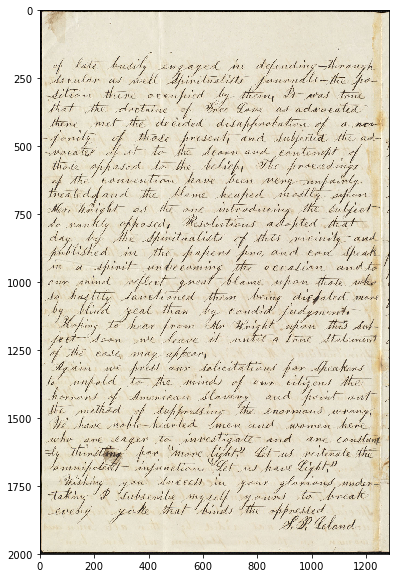

In [3]:
# load image
example = Image.open("images/segmentation/segment_example_pre.jpeg")
plt.imshow(example)
plt.show()

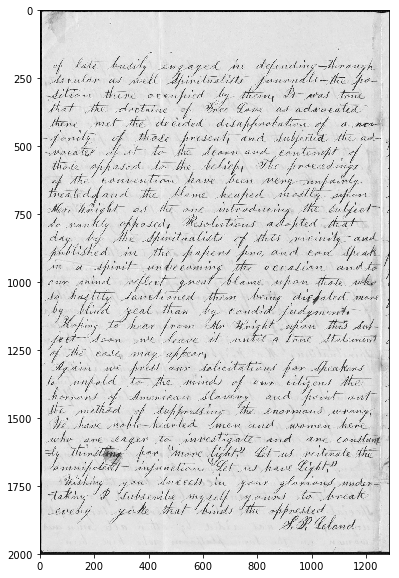

In [4]:
# convert to greyscale
example_gr = example.convert("L")
example_gr.save("images/segmentation/segment_example_grey.jpeg")
plt.imshow(example_gr, cmap="gray")
plt.show()

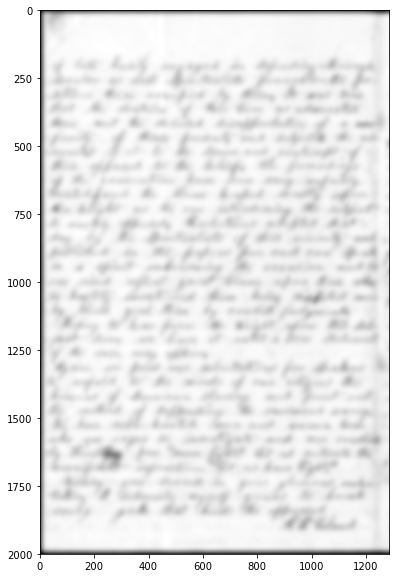

In [5]:
# smooth image
example_gr = np.array(example_gr)
ex_smooth = smoothImg(example_gr, 10)
saveNP(ex_smooth, "images/segmentation/segment_example_smooth.jpeg")
plt.imshow(ex_smooth, cmap="gray")
plt.show()

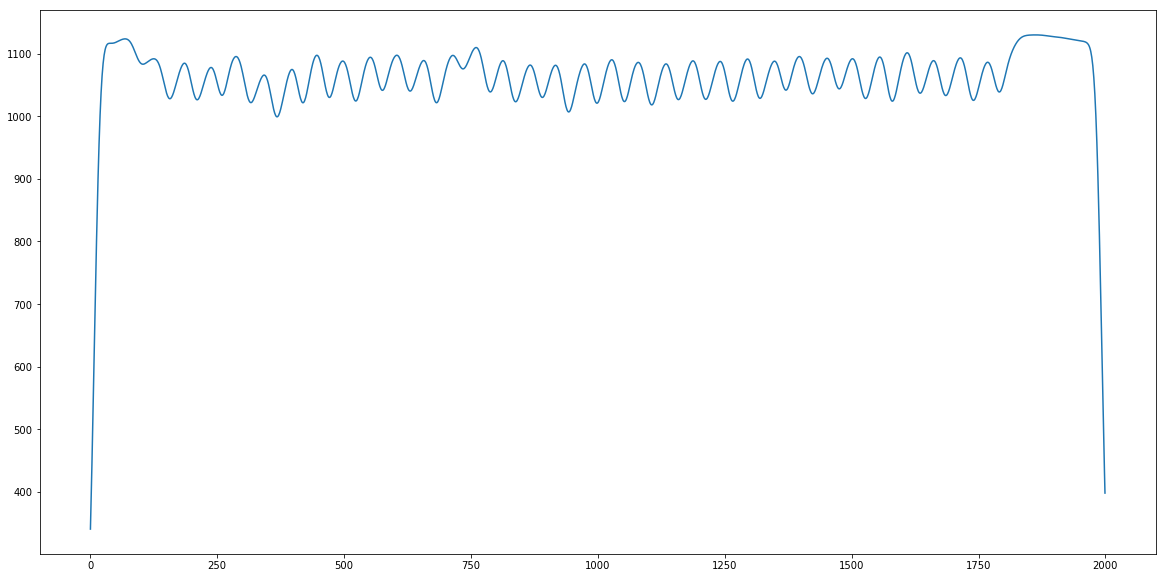

In [6]:
# project onto y axis, plot histogram, and save
proj = project(ex_smooth, "y")
matplotlib.rcParams['figure.figsize'] = [20, 10]
plt.plot(proj[::-1])
plt.show()
matplotlib.rcParams['figure.figsize'] = [10, 10]

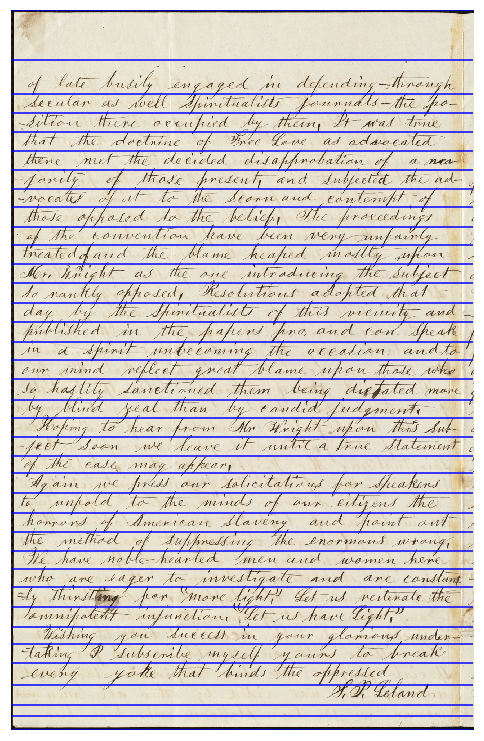

In [7]:
# plot the segmented image
lb = projBreaks(ex_smooth, "y")
plt.imshow(example)
plt.plot([0,ex_smooth.shape[1]], [lb, lb], 'b')

plt.gca().set_axis_off()
plt.subplots_adjust(top=1,bottom=0,right=1,left=0,
                    hspace=0,wspace=0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.savefig("images/segmentation/segment_example.jpeg", bbox_inches="tight",
            pad_inches=0)

plt.show()
# plt.close()